In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
# Load the dataset
clean_loan_data = pd.read_csv("/Users/faisaldernawi/Desktop/Training_And_Development/GW_Bootcamp/Homework/Project_4/Loan_Approval_Classification-/Resources/clean_loan_data.csv")

In [33]:
# Display basic info
print(clean_loan_data.info())
print(clean_loan_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44995 entries, 0 to 44994
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44995 non-null  int64  
 1   person_gender                   44995 non-null  object 
 2   person_education                44995 non-null  object 
 3   person_income                   44995 non-null  int64  
 4   person_emp_exp                  44995 non-null  int64  
 5   person_home_ownership           44995 non-null  object 
 6   loan_amnt                       44995 non-null  int64  
 7   loan_intent                     44995 non-null  object 
 8   loan_int_rate                   44995 non-null  float64
 9   loan_percent_income             44995 non-null  float64
 10  cb_person_cred_hist_length      44995 non-null  int64  
 11  credit_score                    44995 non-null  int64  
 12  previous_loan_defaults_on_file  

In [34]:
# Ensuring the data does column "credit score" not have any NaN values 
print(clean_loan_data.columns)
print(clean_loan_data["credit_score"].isna().sum())  

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')
0


In [35]:
# Checking data types
print(clean_loan_data.dtypes)

person_age                          int64
person_gender                      object
person_education                   object
person_income                       int64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                           int64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length          int64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [37]:
# Set correct data types
clean_loan_data['person_age'] = clean_loan_data['person_age'].astype(int)
clean_loan_data['person_income'] = clean_loan_data['person_income'].astype(int)
clean_loan_data['person_emp_exp'] = clean_loan_data['person_emp_exp'].astype(int)
clean_loan_data['loan_amnt'] = clean_loan_data['loan_amnt'].astype(int)
clean_loan_data['loan_int_rate'] = clean_loan_data['loan_int_rate'].astype(float)
clean_loan_data['loan_percent_income'] = clean_loan_data['loan_percent_income'].astype(float)
clean_loan_data['cb_person_cred_hist_length'] = clean_loan_data['cb_person_cred_hist_length'].astype(int)
clean_loan_data['credit_score'] = clean_loan_data['credit_score'].astype(int)
clean_loan_data['loan_status'] = clean_loan_data['loan_status'].astype(int)  

# For categorical columns, we use 'category' type
clean_loan_data['person_gender'] = clean_loan_data['person_gender'].astype('category')
clean_loan_data['person_education'] = clean_loan_data['person_education'].astype('category')
clean_loan_data['person_home_ownership'] = clean_loan_data['person_home_ownership'].astype('category')
clean_loan_data['loan_intent'] = clean_loan_data['loan_intent'].astype('category')
clean_loan_data['previous_loan_defaults_on_file'] = clean_loan_data['previous_loan_defaults_on_file'].astype('category')


print(clean_loan_data.dtypes)

person_age                           int64
person_gender                     category
person_education                  category
person_income                        int64
person_emp_exp                       int64
person_home_ownership             category
loan_amnt                            int64
loan_intent                       category
loan_int_rate                      float64
loan_percent_income                float64
cb_person_cred_hist_length           int64
credit_score                         int64
previous_loan_defaults_on_file    category
loan_status                          int64
dtype: object


/var/folders/1n/30svk5qs1vl10kwj3skqy9hc0000gn/T/ipykernel_76461/1745468716.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=clean_loan_data, palette='coolwarm')


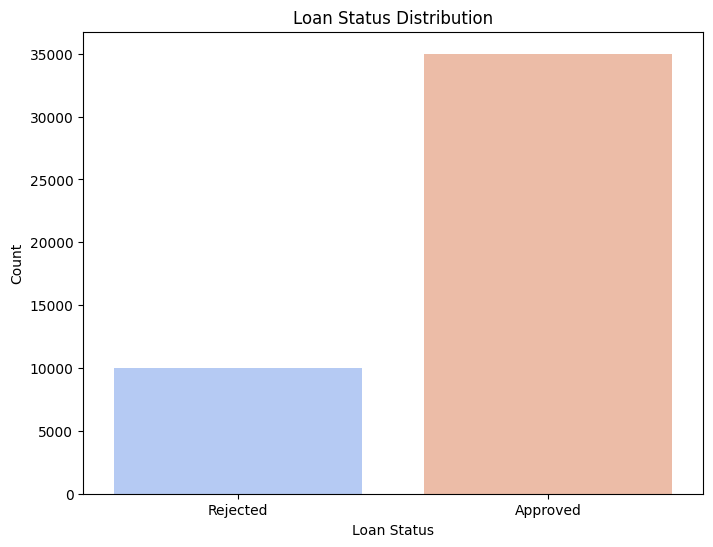

In [38]:
# Map loan_status to Approved/Rejected for visualization
clean_loan_data['loan_status'] = clean_loan_data['loan_status'].map({0: "Approved", 1: "Rejected"})

# Visualize the distribution of loan status
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=clean_loan_data, palette='coolwarm')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

/var/folders/1n/30svk5qs1vl10kwj3skqy9hc0000gn/T/ipykernel_76461/2228107948.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Loan Status")


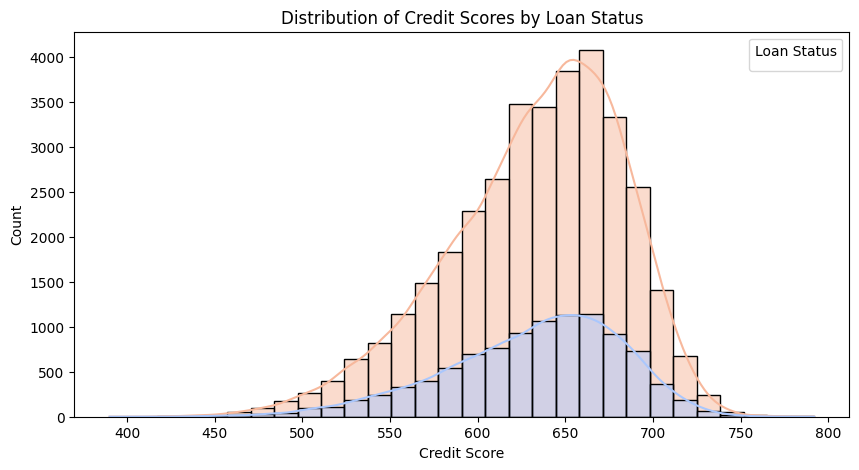

In [39]:
# Loan Approval vs Credit Score
plt.figure(figsize=(10, 5))
sns.histplot(data=clean_loan_data, x="credit_score", hue="loan_status", bins=30, kde=True, palette="coolwarm")
plt.title("Distribution of Credit Scores by Loan Status")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

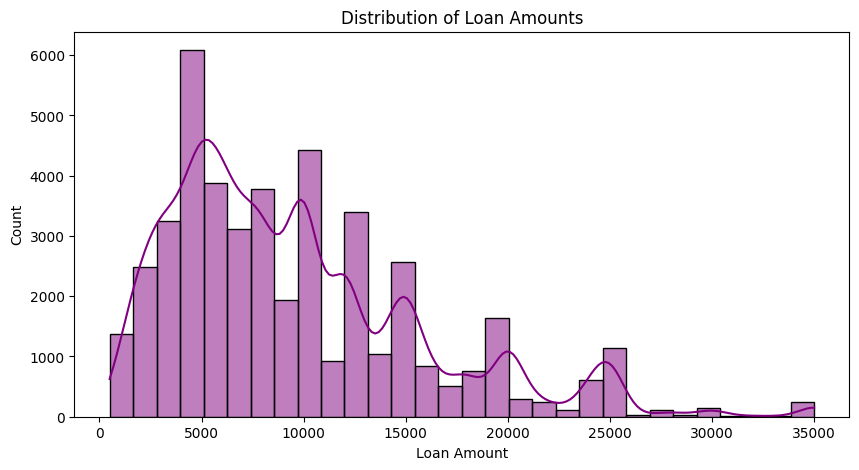

In [40]:
# Loan Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(clean_loan_data["loan_amnt"], bins=30, kde=True, color="purple")
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

/var/folders/1n/30svk5qs1vl10kwj3skqy9hc0000gn/T/ipykernel_76461/3800763872.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clean_loan_data, x="loan_status", y="loan_int_rate", palette="coolwarm")


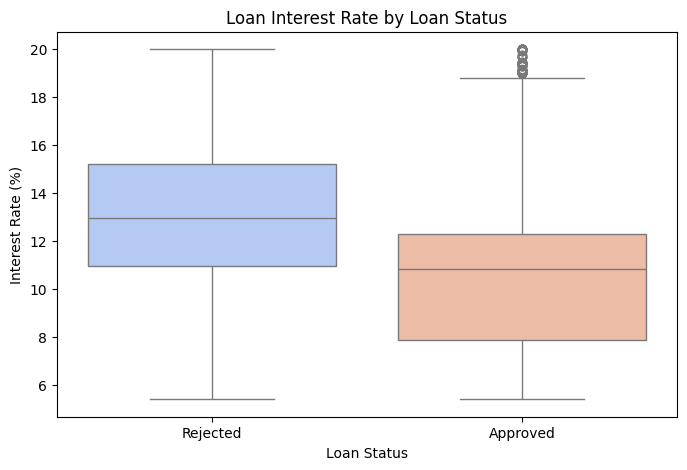

In [41]:
# Loan Interest Rate vs Loan Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=clean_loan_data, x="loan_status", y="loan_int_rate", palette="coolwarm")
plt.title("Loan Interest Rate by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate (%)")
plt.show()

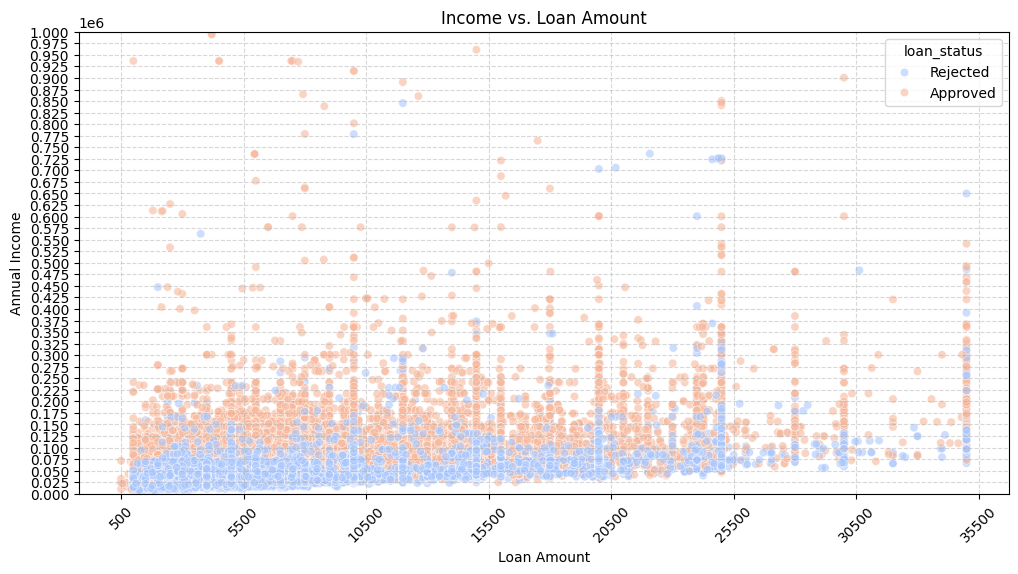

In [52]:
# Loan Amount vs Income


plt.figure(figsize=(12, 6))
sns.scatterplot(data=clean_loan_data, x="loan_amnt", y="person_income", hue="loan_status", alpha=0.6, palette="coolwarm")

plt.title("Income vs. Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Annual Income")

# Set X-axis ticks dynamically
plt.xticks(np.arange(clean_loan_data["loan_amnt"].min(), clean_loan_data["loan_amnt"].max() + 5000, 5000), rotation=45)

# Set Y-axis ticks from 0 to 1,000,000 in increments of 25,000
plt.yticks(np.arange(0, 1000000 + 25000, 25000))

plt.ylim(0, 1000000)  # Ensure the max value is 1,000,000

plt.grid(True, linestyle="--", alpha=0.5)  # Add grid lines for clarity

plt.show()

/var/folders/1n/30svk5qs1vl10kwj3skqy9hc0000gn/T/ipykernel_76461/3594035328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_intent", data=clean_loan_data, order=clean_loan_data["loan_intent"].value_counts().index, palette="muted")


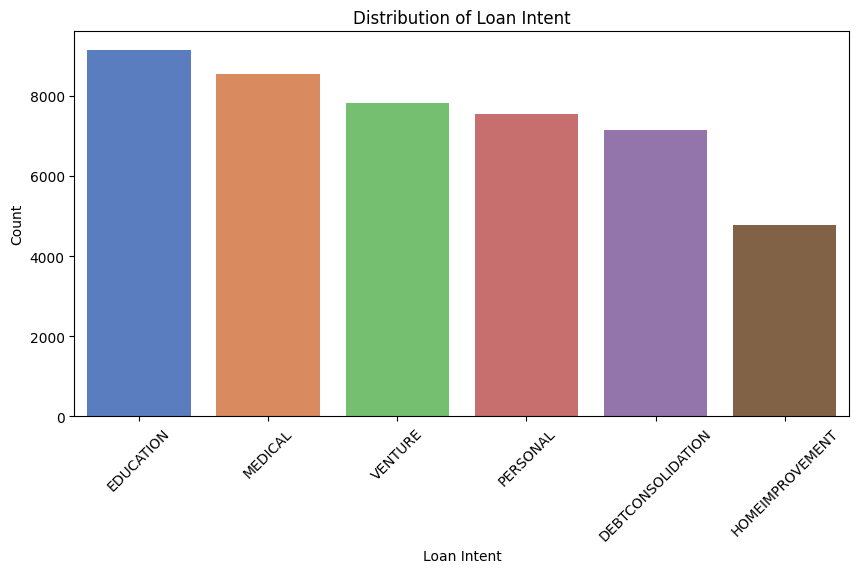

In [43]:
# Loan Intent
plt.figure(figsize=(10, 5))
sns.countplot(x="loan_intent", data=clean_loan_data, order=clean_loan_data["loan_intent"].value_counts().index, palette="muted")
plt.title("Distribution of Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

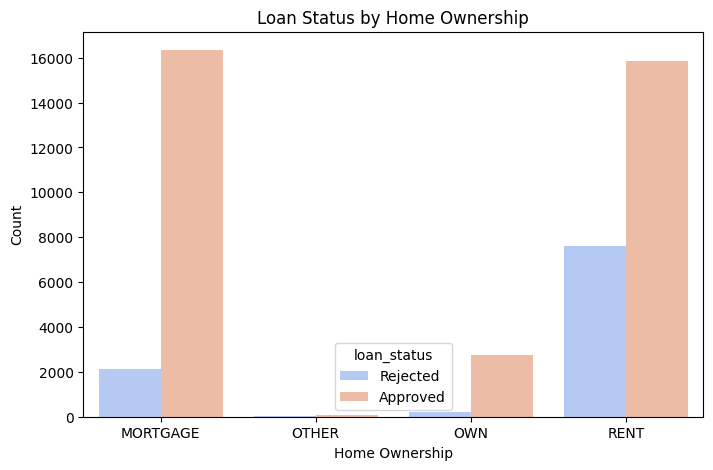

In [45]:
# Home ownership vs. Loan Status
plt.figure(figsize=(8, 5))
sns.countplot(x="person_home_ownership", hue="loan_status", data=clean_loan_data, palette="coolwarm")
plt.title("Loan Status by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.show()